In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/data.csv',encoding='ISO-8859-1')

In [17]:

# @title First 10 Rows of Dataset
data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [26]:
# @title Last 10 Rows of Dataset
data.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,145.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.000000,61.000000,161.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,44.000000,148.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.000000,44.000000,131.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.000000,45.000000,140.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaT
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaT
435741,NaN,NaN,Tripura,NaN,NaN,NaN,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaT


In [11]:
# @title Number of Null values in each column
data.isnull().sum()

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149481
type,5393
so2,34646
no2,16233
rspm,40222
spm,237387


In [12]:
# @title Information on Datset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [16]:
# @title Number of rows and columns in the datset
data.shape
print('Number of rows: ',data.shape[0])
print('Number of columns: ',data.shape[1])

Number of rows:  435742
Number of columns:  13


In [31]:
# @title Replacing Null values(NaN) with column mean
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)
data.head(5)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,NaN,40.791467,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,108.832784,220.78348,NaN,40.791467,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,NaN,40.791467,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,NaN,40.791467,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,108.832784,220.78348,NaN,40.791467,1990-03-01


In [38]:
# @title Top 5 locations with the highest RSPM values
top_5_rspm = data[['location', 'rspm']].sort_values(by='rspm', ascending=False).head(5)
print(top_5_rspm)


          location         rspm
389753     Lucknow  6307.033333
334297       Alwar  1288.000000
352679  Coimbatore  1183.500000
334296       Alwar  1156.000000
395315    Bareilly  1111.000000


In [39]:
# @title Average pollutant levels by location
avg_pollutants_by_location = data.groupby('location')[['so2', 'no2', 'rspm', 'spm']].mean()
print(avg_pollutants_by_location)


                      so2        no2        rspm         spm
location                                                    
ANKLESHWAR      18.940120  22.898204   83.868263  220.783480
Agra             6.944603  20.099401  172.344986  301.441386
Ahmedabad       14.175219  22.359551   96.185479  218.708282
Aizawl           4.523379  10.395865   42.540202  169.032094
Akola            7.937023   9.357824  133.359259  220.783480
...                   ...        ...         ...         ...
Warangal         5.526424  11.772586   53.516929  213.662569
Wayanad          2.006445   6.012109   36.984375  220.783480
West Singhbhum  20.947020  30.715232  246.417219  220.783480
Yamuna Nagar    20.342178  20.263093  132.639612  234.191855
Yamunanagar     14.475214  29.542780  173.517392  243.992969

[304 rows x 4 columns]


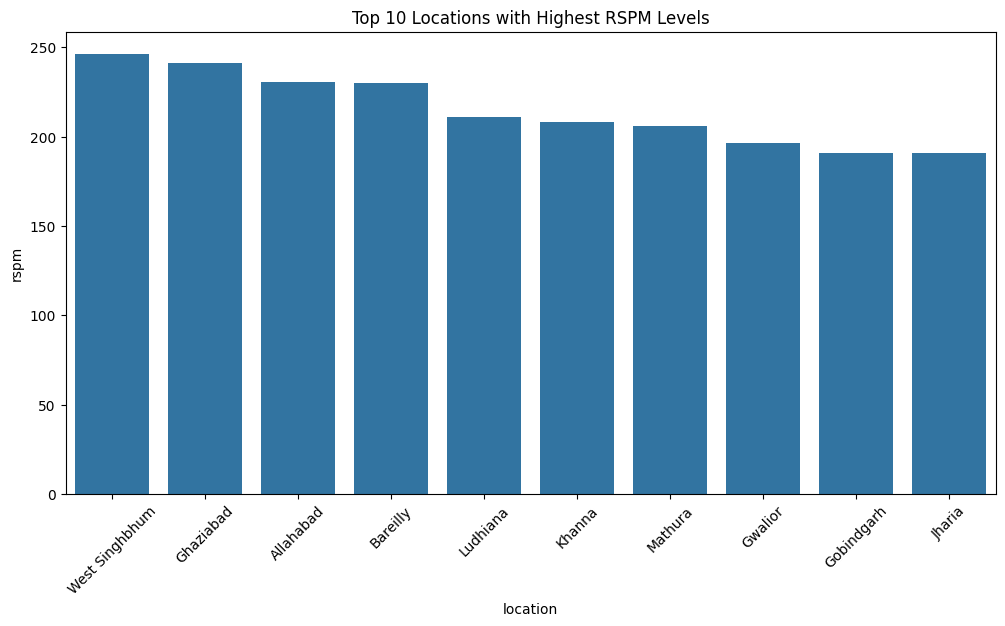

In [43]:
# @title Plot Top 10 Locations with Highest RSPM Levels
top_locations = data.groupby('location')['rspm'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='location', y='rspm', ci=None)
plt.xticks(rotation=45)
plt.title("Top 10 Locations with Highest RSPM Levels")
plt.show()



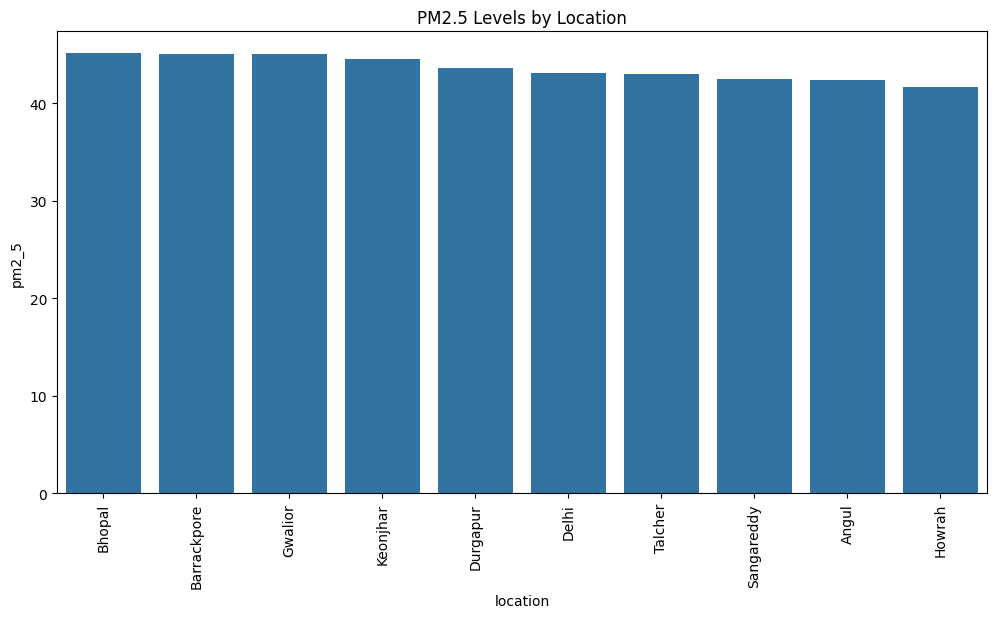

In [48]:
# @title Top 10 locations with highest PM2_5 levels

import seaborn as sns
import matplotlib.pyplot as plt
top_locations = data.groupby('location')['pm2_5'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='location', y='pm2_5', ci=None)
plt.xticks(rotation=90)
plt.title("PM2.5 Levels by Location")
plt.show()



In [49]:
# @title  Filter data for Delhi
delhi_data = data[data['location'] == 'Delhi']
print(delhi_data.head())


      stn_code sampling_date  state location                           agency  \
65861       60      9/1/1987  Delhi    Delhi  Central Pollution Control Board   
65862       59      9/2/1987  Delhi    Delhi  Central Pollution Control Board   
65863       58      9/3/1987  Delhi    Delhi  Central Pollution Control Board   
65864       57      9/3/1987  Delhi    Delhi  Central Pollution Control Board   
65865       56      9/2/1987  Delhi    Delhi  Central Pollution Control Board   

              type   so2   no2        rspm    spm location_monitoring_station  \
65861  Residential   8.6  16.2  108.832784  323.0                         NaN   
65862  Residential   6.5   9.3  108.832784  488.0                         NaN   
65863   Industrial  25.8  10.4  108.832784  487.0                         NaN   
65864   Industrial   0.5   2.8  108.832784  528.0                         NaN   
65865   Industrial   2.5  12.8  108.832784  506.0                         NaN   

           pm2_5       dat

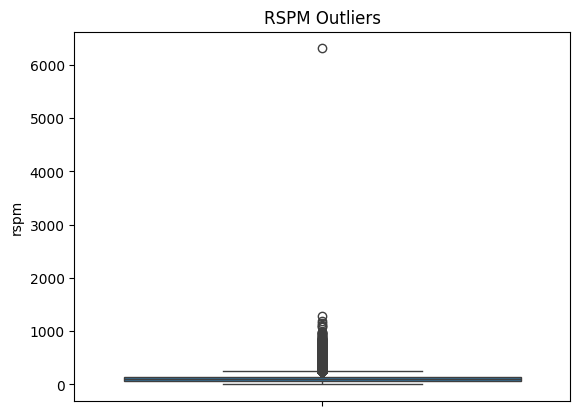

In [50]:
# @title Identify outliers in RSPM using a boxplot
sns.boxplot(data=data, y='rspm')
plt.title("RSPM Outliers")
plt.show()


In [51]:
# @title Yearly trend of NO2 levels
data['year'] = data['date'].dt.year
yearly_no2_trend = data.groupby('year')['no2'].mean()
print(yearly_no2_trend)


year
1987.0    29.491222
1988.0    29.760823
1989.0    29.133041
1990.0    25.716276
1991.0    25.979130
1992.0    30.458832
1993.0    30.100067
1994.0    31.497093
1995.0    32.245832
1996.0    26.464032
1997.0    27.953251
1998.0    27.216228
1999.0    28.271167
2000.0    28.924933
2001.0    28.563771
2002.0    27.102435
2003.0    21.849922
2004.0    27.920846
2005.0    28.255984
2006.0    26.574794
2007.0    26.431608
2008.0    27.590737
2009.0    25.984429
2010.0    26.781211
2011.0    28.155290
2012.0    24.779108
2013.0    22.306690
2014.0    24.434144
2015.0    23.627529
Name: no2, dtype: float64


In [52]:
# @title Check if pollution levels exceed government safety limits
safety_limits = {'so2': 20, 'no2': 40, 'rspm': 60, 'spm': 100}
exceeded = data[(data['so2'] > safety_limits['so2']) |
              (data['no2'] > safety_limits['no2']) |
              (data['rspm'] > safety_limits['rspm']) |
              (data['spm'] > safety_limits['spm'])]
print(exceeded)


       stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               Andhra Pradesh  Hyderabad   
1         151.0  February - M021990               Andhra Pradesh  Hyderabad   
2         152.0  February - M021990               Andhra Pradesh  Hyderabad   
3         150.0     March - M031990               Andhra Pradesh  Hyderabad   
4         151.0     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                                           agency  

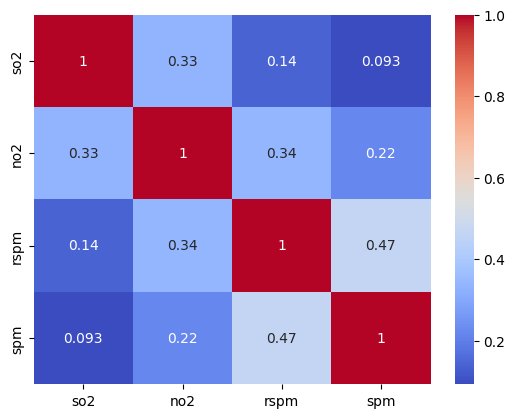

In [53]:
# @title Correlation between pollutants
correlation_matrix = data[['so2', 'no2', 'rspm', 'spm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [54]:
# @title City with the highest NO2 levels
highest_no2_city = data.loc[data['no2'].idxmax(), ['location', 'no2']]
print(highest_no2_city)


location    Jaipur
no2          876.0
Name: 340312, dtype: object
